KINTU DECLAN TREVOR - 100944330

LAB-2: Creating a Convolutional Nueral Network to classify digits in a MNIST dataset.

Data from: https://github.com/myleott/mnist_png/raw/master/

1) Import Libraries

In [24]:
import gzip
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2) Define Custom Functions.

In [25]:
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

In [26]:
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)
    return labels

3) Load training data

In [27]:
train_X = load_mnist_images('train-images-idx3-ubyte.gz')
train_y = load_mnist_labels('train-labels-idx1-ubyte.gz')

4) Load testing data

In [28]:
test_X = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_y = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

5) Explore Data

In [29]:
print('X_train shape:', train_X.shape)
print('Y_train shape:', train_y.shape)
print('X_test shape:', test_X.shape)
print('Y_test shape:', test_y.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


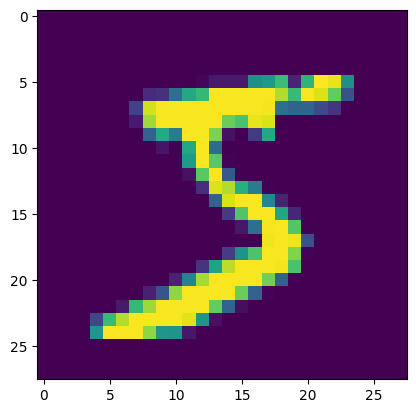

In [30]:
plt.imshow(train_X[0])

In [31]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

6) Preprocess the data

In [32]:
# The original pixel values range from 0 to 255 (since they are grayscale images).
# Dividing each pixel value by 255.0 normalizes them to the range [0, 1].
# Normalization helps the neural network converge faster during training and ensures that all features have a similar scale.

train_X = train_X / 255.0
test_X = test_X / 255.0

7) Handle categorical values:

In [33]:
# The train_y and test_y variable contains the labels (target values) for the training data.
# The MNIST dataset has 10 classes (digits 0 to 9).
# to_categorical converts the integer labels (0 to 9) into one-hot encoded vectors.
# For example, if the original label is 3, it will be converted to [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

8) See image after preprocessing

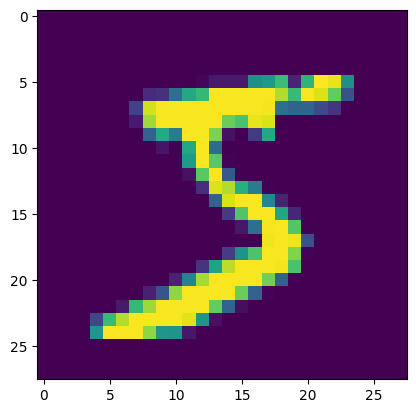

In [34]:
plt.imshow(train_X[0])

9) Build Model

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

10) Compile the model

In [37]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

11) Train the model

In [38]:
model.fit(train_X, train_y, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 9s 11ms/step - loss: 0.2034 - accuracy: 0.9399 - val_loss: 0.0797 - val_accuracy: 0.9760
Epoch 2/5
750/750 [==============================] - 9s 11ms/step - loss: 0.0636 - accuracy: 0.9808 - val_loss: 0.0649 - val_accuracy: 0.9812
Epoch 3/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.0574 - val_accuracy: 0.9832
Epoch 4/5
750/750 [==============================] - 8s 11ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0640 - val_accuracy: 0.9828
Epoch 5/5
750/750 [==============================] - 8s 10ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.0595 - val_accuracy: 0.9843


12) Evaluate model

In [39]:
test_loss, test_acc = model.evaluate(test_X, test_y)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0469 - accuracy: 0.9845
Test accuracy: 0.9845


In [40]:
result = model.predict(test_X[:5])
result

1/1 [==============================] - 0s 63ms/step


array([[1.04813402e-07, 1.84427563e-07, 2.83185491e-05, 6.71027577e-04,
        9.31887068e-11, 3.59124774e-09, 9.64180385e-12, 9.99274433e-01,
        1.60632771e-05, 9.90389890e-06],
       [1.13121885e-07, 8.95087567e-07, 9.99998689e-01, 2.82874577e-08,
        6.41105482e-14, 5.17818344e-10, 2.85112769e-08, 1.24928526e-10,
        2.12520234e-07, 3.05248500e-11],
       [4.07579847e-07, 9.99946594e-01, 6.43619728e-07, 3.27660317e-08,
        8.22047605e-06, 7.21620736e-08, 5.14932537e-07, 3.20113941e-05,
        1.13063270e-05, 1.19408455e-07],
       [9.99929428e-01, 8.22772463e-08, 9.36876040e-06, 7.05414109e-08,
        2.44477025e-08, 5.45666694e-08, 5.92751603e-05, 1.84827336e-08,
        6.45311786e-07, 1.02698891e-06],
       [1.84190851e-09, 1.40418850e-08, 6.47186766e-07, 1.36184099e-07,
        9.99997497e-01, 1.95557237e-10, 5.26553876e-08, 1.38565824e-07,
        5.01484067e-07, 1.01938895e-06]], dtype=float32)

In [41]:
test_y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
result.argmax(axis=1)

array([7, 2, 1, 0, 4], dtype=int64)

In [43]:
test_y[:10].argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)